# Нейронные сети (Keras)

N1 = x1*w1 + x2*w2 результат в одном нейроне

Y = N1*wk + N2*wp результат выходного слоя

Существуют входные слои (исходные данные, те или иные)

Скрытый слой (некоторое количество слоев с некоторым кол-вом нейронов)

Выходной слой (необязательно один нейрон)

### В нейроне существуют функции активации - функция применяемая на сложенные значения в нейроне

identity - ничего не делаем

logistic (сигмоид) f(x)=1/(1+exp(x))

relu (линейный выпрямитель) f(x) = max(0,x) - обнуляет отрицательнные значения

tanh (гиперболический тангенс) - f(x)=tanh(x)=(exp(x)-exp(-x))/(exp(x)+exp(-x))

### Всё это нужно для такой нормировки данных

## Оптимизаторы

В итоге сводим задачу к нахождению весов весов для сведения ошибки к минимум, начинаем это делать с конца

lbfgs - квазиньютоновский метод, итерационный метод 

sgd - стохастический градиентный спуск, вместо реального градиента вычисляют его оценку (так вычислительно проще)

adam - близкие к оптимуму параметры должны меняться меньше, другие сильнее (идейно должен лучше преодолевать локальные минимумы)

In [66]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
df = pd.read_csv('delaney-processed.csv')

In [68]:
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Compound ID                                      1128 non-null   object 
 1   ESOL predicted log solubility in mols per litre  1128 non-null   float64
 2   Minimum Degree                                   1128 non-null   int64  
 3   Molecular Weight                                 1128 non-null   float64
 4   Number of H-Bond Donors                          1128 non-null   int64  
 5   Number of Rings                                  1128 non-null   int64  
 6   Number of Rotatable Bonds                        1128 non-null   int64  
 7   Polar Surface Area                               1128 non-null   float64
 8   measured log solubility in mols per litre        1128 non-null   float64
 9   smiles                        

In [70]:
x = np.array(df.iloc[:,3:8]) #отобрали 5 колонок для модели
y = np.array(df.iloc[:,8]).reshape(-1,1)
print(x.shape,y.shape)

(1128, 5) (1128, 1)


In [71]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1240, train_size=0.8)
print(x_test.shape)

(226, 5)


In [73]:

from tensorflow.keras.models import Sequential

In [74]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

Делаем нейроку с такими слоями: Схема из 5 >>> 10 >>> 5 >>> 3 >>> 1 результат

In [75]:
nn1 = Sequential() # сгенирили прямоходную модель
nn1.add(Dense(10, input_dim=5)) # генерим слои + вводим на первый раз кол-во исходных данных
nn1.add(Dense(5))
nn1.add(Dense(3))
nn1.add(Dense(1))

In [76]:
nn1.compile(loss='mse', optimizer=Adam(learning_rate=0.001)) #создали модель с алгоритмом Adam

In [77]:
hist1 = nn1.fit(x_train, y_train, validation_data=(x_test, y_test),
        batch_size=100, epochs=100, verbose=1) #обучение происходить обычно пачками данных (не целиком), когда они закончились - прошла эпоха

Epoch 1/100
10/10 [==============================] - 1s 14ms/step - loss: 22.7292 - val_loss: 21.8889
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 19.5515 - val_loss: 19.2248
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 17.1354 - val_loss: 17.0550
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 15.0881 - val_loss: 15.2906
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 13.4457 - val_loss: 13.8071
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 12.0969 - val_loss: 12.5701
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 10.9420 - val_loss: 11.4639
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 9.9332 - val_loss: 10.4470
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 8.9880 - val_loss: 9.5139
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 8.1186 - val_loss: 

In [78]:
y_pred = nn1.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [79]:
from sklearn import metrics as s_metrics

In [80]:
print('Тренировочный набор R2',s_metrics.r2_score(y_train, nn1.predict(x_train)))
print('Тестовый набор R2',s_metrics.r2_score(y_test,y_pred))

29/29 [==============================] - 0s 1ms/step
Тренировочный набор R2 0.6787773920694042
Тестовый набор R2 0.685221299579664


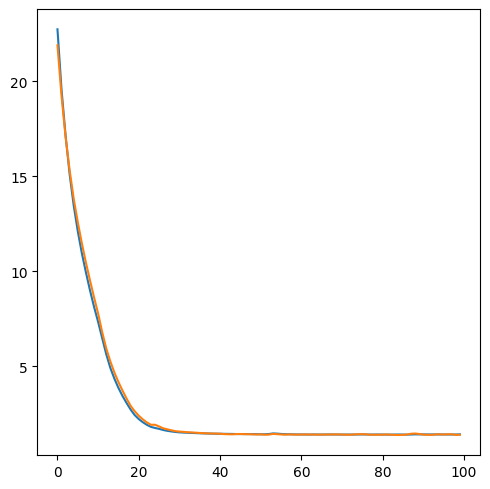

In [81]:
fig, ax = plt.subplots(figsize=(5,5)) # строим кривые обучения
ax.plot(hist1.history['loss'])# потери для тренировочного набора
ax.plot(hist1.history['val_loss']) # потери для тестого набора

plt.tight_layout()
plt.show()

29/29 [==============================] - 0s 3ms/step


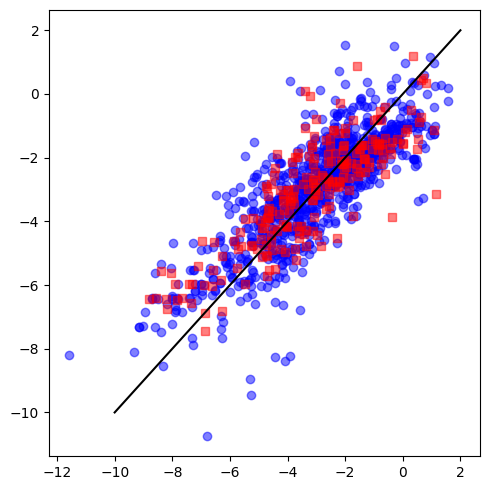

In [82]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(y_train, nn1.predict(x_train), 'bo', alpha=0.5)
ax.plot(y_test, y_pred, 'rs', alpha=0.5)

ax.plot([-10,2], [-10,2], 'k-')

plt.tight_layout()
plt.show()